Team name: Neighborhood Navigators
Jhanvi Sharma - jhs92@pitt.edu
Seamus Quigley - sjq6@pitt.edu
Kace Martinez - kam793@pitt.edu

Hey everyone! Our team had the great idea of finding the best neighborhood for a superhero (Batman)! ourobjective was to find the place with the most amount of destruction so that our superhero has a ton crime to fight against. We used the following metrics: "fire incidents", "crime incidents", and "Pittsburgh population density".

Below, I am importing the pd and Geopandas.
After, we simply read in the csv

In [1]:
import pandas as pd
import geopandas
url = "8d76ac6b-5ae8-4428-82a4-043130d17b02.csv"
df = pd.read_csv(url)
df

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,12575,F240027649,150.0,"Outside rubbish fire, Other","1700 BLOCK DAGMAR AVE, PITTSBURGH PA",0,2024-04-02T13:54:21,231EN28,1920.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.408709,-80.022745
9775,12607,F240026921,111.0,Building fire,"00 BLOCK MILES AVE ING, INGRAM PA",2,2024-03-31T06:33:31,231EN31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-16A,NaN,NaN
9776,12608,F240027382,154.0,Dumpster or other outside trash receptacle fire,"5500 BLOCK 5TH AVE, PITTSBURGH PA",0,2024-04-01T23:36:09,231EN18,1402.0,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,2-17,40.448944,-79.932527
9777,12609,F240028205,150.0,"Outside rubbish fire, Other","2700 BLOCK JANE ST, PITTSBURGH PA 15120",0,2024-04-03T19:21:30,231EN24,1609.0,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.425230,-79.967811


For simplified analysis, we group th data by the "neighborhood" column. We are interested in the counted of id within each neighborhood. We are just calculating the number of occurances of "_id" within the data frame.

In [2]:
df_grouped = df.groupby("neighborhood").count()["_id"]
df_grouped = df_grouped.dropna()
df_grouped

neighborhood
Allegheny Center        62
Allegheny West          43
Allentown              127
Arlington               51
Arlington Heights       13
                      ... 
Upper Lawrenceville     52
West End                23
West Oakland            62
Westwood                28
Windgap                 23
Name: _id, Length: 91, dtype: int64

Now we will use geopandas to read in the csv that is provided to us. 

In [3]:
#df_grouped = df_grouped.set_index("_id")
#df_grouped.index = pd.to_datetime(df_grouped.index)
#merged_data = pd.merge(df_grouped, hood, left_on = "_id")
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

We are now merging the neighborhoods data frame with our data frame. how= left means a left join, meaning all rows from "neighborhoods". lefton="hood" means this is the key column for the merge and righton = "neighborhood" uses the colum fron df_grouped.

In [4]:
steps_map = neighborhoods.merge(df_grouped, how='left', left_on='hood', right_on='neighborhood')

Geospatial visualization, where each neighborhood or area represented in the DataFrame is plotted according to the values in the _id column. 

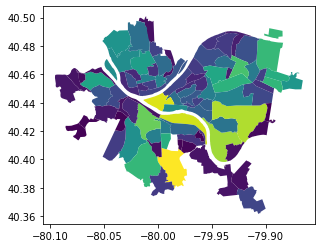

In [5]:
steps_map.head()
steps_map.sort_values("_id")
steps_map.plot(column="_id") #.bar( x="hood", y="_id")

Heat map:
The greater the quantity of fires, the darker the color on the map.


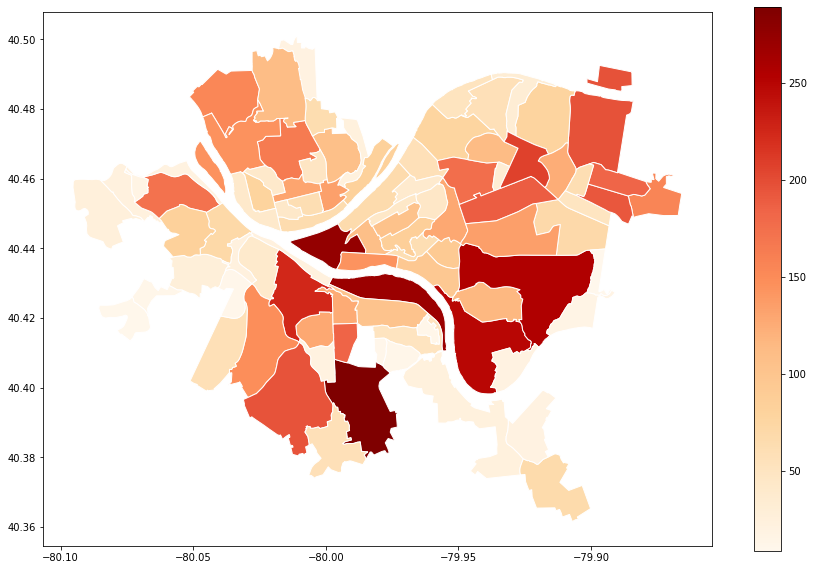

In [6]:
steps_map.plot(column='_id', # set the data to be used for coloring
               cmap='OrRd' , edgecolor="white",        # outline the districts in white
               legend=True,
               # label the legend
               figsize=(15, 10)        # set the size
              
               # choose a color palette
               )

Simplfies the data, only depicting the hood and _id colummns in a dataframe.

In [7]:
steps_map.sort_values("_id", ascending = False)[["hood", "_id"]].head()

,hood,_id
32,Carrick,289
5,Central Business District,274
13,South Side Flats,270
24,Squirrel Hill South,256
18,Hazelwood,249


Below is a bar graph showcasing the above values.

/opt/tljh/user/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <BarContainer object of 5 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


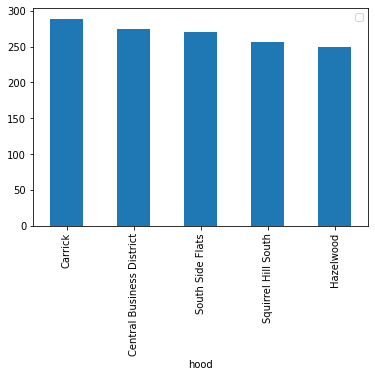

In [8]:
steps_map.sort_values("_id", ascending = False)[["hood", "_id"]].head(5).plot(kind="bar", x="hood")

Overall, after filtering a and sorting this database on the fire incidents, I can conclude that the best neighborhood for a superhero would be Carrick. Carrick has has the most fires, and therefore gives our superhero the most amount of danger to fight against!

# Crime Incidents

by: Seamus Quigley, SJQ6@pitt.edu

Batman needs lots of villains to fight so this notebook will be looking at crime incidents reported in Pittsburgh!

First im going to import pandas into this notebook.


In [9]:
import pandas as pd
# imports pandas library

read in the file, and drop all rows that return null.

In [10]:
crime = pd.read_csv('crime.csv')
# Drop the missing values rows
crime = crime.dropna()


this filters out incident neighborhoods that do not have a lot of information and prints a smaller sample size of the total csv file. 

In [11]:
def filter_popular(x, threshold):
    return (x['HIERARCHY'].count() >= threshold)


popular_crime = crime.groupby("INCIDENTNEIGHBORHOOD").filter(lambda x: x["HIERARCHY"].count() >= 1000)
# look at what centers are in the data now
popular_crime.groupby("INCIDENTNEIGHBORHOOD").count()
popular_crime.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
5,6,2802321,16000045.0,23,2016-01-01T00:24:00,"1300 Block E CARSON ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 3503.B1I DEF. TRESPA...,1702.0,3.0,4.0,-79.985175,40.428607


In crime reports, the crime hierarchy is a ranking (1-99) which represents the severity of the incident, the lower the number the more severe the crime is. 

This prints out the average hierarchy ranking of all of the neighborhoods.

In [13]:
crime['HIERARCHY'].mean()

11.570001722059583

This adds up all of the times that a neighborhood is mentioned and prints the top 5 and bottom 5

In [14]:
count_neighbor = crime["INCIDENTNEIGHBORHOOD"].value_counts()
count_neighbor.sort_values(ascending = False)
#this is the good one dont delete

South Side Flats             8785
Central Business District    5670
Carrick                      4589
Bloomfield                   3862
Shadyside                    3412
                             ... 
Mt. Oliver Neighborhood        77
Chartiers City                 75
Mt. Oliver Boro                26
Outside State                  13
Outside County                  4
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

According to this data, the South Side Flats is the most dangerous area with 8785 incidents. 

This is a pie chart of the top 5 neighborhoods with the most crime incidents

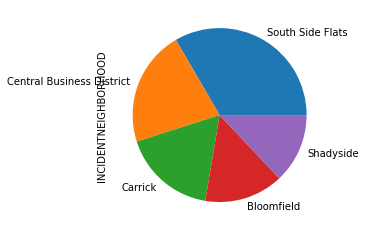

In [15]:
top_five = count_neighbor.head(5)
top_five.plot.pie(subplots=False, figsize=(8, 4))

And now a bar graph because those are fun.

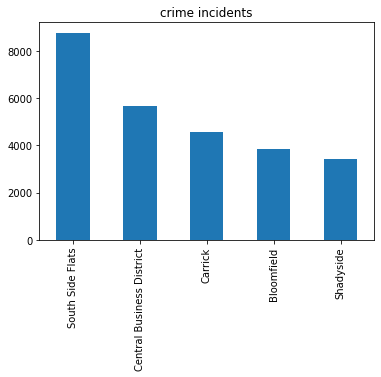

In [16]:
top_five.plot.bar(stacked=True, title="crime incidents")

Okay now lets get a little more specific, these are the top 5 addresses with the most crime incidents

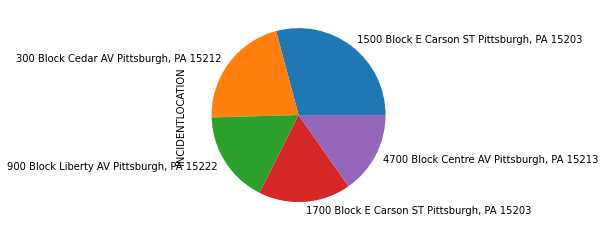

In [17]:
count_area = crime["INCIDENTLOCATION"].value_counts()
count_area.sort_values(ascending = False)
top_area = count_area.head(5)
top_area.plot.pie(subplots=False, figsize=(8, 4))

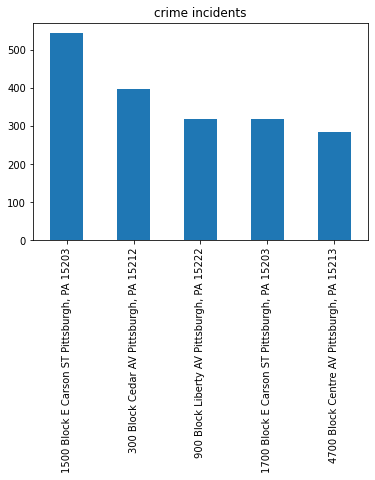

In [18]:
top_area.plot.bar(stacked=True, title="crime incidents")

Okay according to this data, the South Side Flats is the most dangerous neighborhood in pittsburgh; so it is the best neighborhood for Batman to be in.

**Neighborhood Navigators take on Pittsburgh !!!**

**Group Members:**
    
    Seamus Quigley sjq6@pitt.edu
    
    Kace Martinez kam793@pitt.edu
    
    Jhanvi Sharma jhs92@pitt.edu

**Kace's Ranking: Population Density**

For this metric, our reasoning is simple: Densely populated neighborhoods are more prone to crime, disaster, and overall calamity.

...in theory at least. 

![calculations](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdWY3aWNhOHRzdmYzM3NoOWM2NWZuanMzZXNhd2wxb3ZzZWZrOGtnMCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/3o6MbseSY3SjTcjIyc/giphy.gif)

Without furtherado, 

Here are the neighborhoods of Pittsburgh ranked by population density (with work shown, of course).

To start off, I used [this data set](https://data.wprdc.org/dataset/pgh/resource/8ac5c768-09ba-43a8-829f-ce4a417d20fb/view/8f31f276-31d5-4925-b8d0-dcfa2f22f28a?state=eyJ0aW1lIjoxNzEyODk4OTU4NTg1LCJzdGFydCI6MCwibGVuZ3RoIjoyMCwib3JkZXIiOltbMCwiYXNjIl1dLCJzZWFyY2giOnsic2VhcmNoIjoiIiwic21hcnQiOnRydWUsInJlZ2V4IjpmYWxzZSwiY2FzZUluc2Vuc2l0aXZlIjp0cnVlfSwiY29sdW1ucyI6W3sidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19LHsidmlzaWJsZSI6dHJ1ZSwic2VhcmNoIjp7InNlYXJjaCI6IiIsInNtYXJ0Ijp0cnVlLCJyZWdleCI6ZmFsc2UsImNhc2VJbnNlbnNpdGl2ZSI6dHJ1ZX19XSwicGFnZSI6MCwicGFnZWxlbiI6MjAsInNlbGVjdGVkIjpbXSwia2V5VGFibGUiOm51bGwsImNoaWxkUm93cyI6W10sInNlbGVjdCI6eyJyb3dzIjpbXSwiY29sdW1ucyI6W10sImNlbGxzIjpbXX19) to get the population, population density, and other information from all the neighborhoods in Pittsburgh. Yes, all 90 of them.

In [19]:
import pandas as pd

%matplotlib inline

In [20]:
data = pd.read_csv("popdens.csv", index_col="Neighborhood")
data.iloc[:]

,_id,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,3,"4,521","3,862","2,512",632,"1,586","1,262",886,933,...,0.64%,40.84%,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
Allegheny West,2,3,"3,210","3,313","2,170","1,124",820,654,508,462,...,0.65%,76.62%,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
Allentown,3,6,"8,227","7,487","6,416","5,361","4,292","3,600","3,220","2,500",...,0.80%,59.40%,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
Arlington,4,7,"2,702","3,203","4,430","3,949","2,294","2,210","1,999","1,869",...,0.37%,76.46%,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
Arlington Heights,5,7,"2,413","2,860","2,272","2,037","1,466","1,497",238,244,...,1.64%,9.43%,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,86,13,"6,848","6,164","5,221","4,482","3,710","3,328","2,899","2,669",...,1.80%,65.72%,0.0296,0.031,0.0643,0.2217,0.2448,0.2957,0.1194,0.0540
West End,87,4,"1,984","1,820","1,702",920,604,441,466,254,...,1.18%,53.15%,0.0748,0.004,0.0000,0.2586,0.2931,0.0862,0.2672,0.0948
West Oakland,88,14,"2,952","4,073","3,658","3,140","2,955","1,938","2,272","2,604",...,0.50%,52.73%,0.0177,0.023,0.0193,0.3886,0.2938,0.1701,0.0806,0.0476


As you can see, this is **way** too much information to process. Seeing as we only need the top ten neighborhoods with the highest population densities, let's do some filtering, shall we?

![lets get started](https://media.giphy.com/media/3o6nUSKuNDSTj3NRBK/giphy.gif?cid=ecf05e474as4rnsu5ebpxsdsjrshkue70487kog2ys58cu2o&ep=v1_gifs_search&rid=giphy.gif&ct=g)

Alright, first order of business, let's get rid of all that extra information about the neighborhoods.

In [21]:
data.iloc[:, 18]

Neighborhood
Allegheny Center        4,442.9
Allegheny West          3,276.6
Allentown               8,474.6
Arlington               3,976.6
Arlington Heights       1,848.5
                         ...   
Upper Lawrenceville     6,590.1
West End                1,270.0
West Oakland           12,111.6
Westwood                4,430.6
Windgap                 3,298.8
Name: Persons / sq. mi (2010), Length: 90, dtype: object

Cool, we did it! Now only the neighborhood and its population density is shown.

... but this is still way too much to even display. 

Let's pick the top 10 out and plot.

In [22]:
data = data.sort_values(by='Persons / sq. mi (2010)', ascending=False)
data.iloc[:10, 18]

Neighborhood
Terrace Village        9,438.6
Greenfield             9,436.0
Squirrel Hill North    9,298.7
East Allegheny         9,050.8
South Shore               89.6
Morningside            8,759.2
Crawford-Roberts       8,744.2
Allentown              8,474.6
Garfield               8,041.6
Mount Washington       7,718.4
Name: Persons / sq. mi (2010), dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

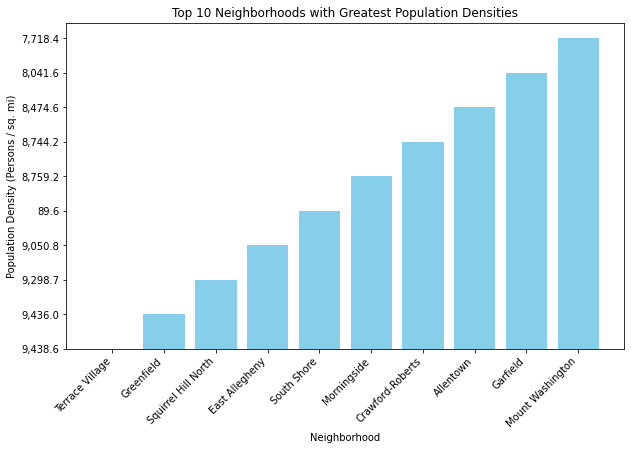

In [23]:
import matplotlib.pyplot as plt

top_10_neighborhoods = data.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods.index, top_10_neighborhoods['Persons / sq. mi (2010)'], color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Population Density (Persons / sq. mi)')
plt.title('Top 10 Neighborhoods with Greatest Population Densities')
plt.xticks(rotation=45, ha='right')

Gee, that was a lot of work...

but we finally got an answer, drumroll please.

![drumroll please](https://media.giphy.com/media/1uWiwCWIZo6yYvLlTE/giphy.gif?cid=790b7611p5qgj0i2995owosuyldize3tt14s8ivmpye1dglo&ep=v1_gifs_search&rid=giphy.gif&ct=g)

The "best" neighborhood in Pittsburgh is...

**CENTRAL OAKLAND**

...what a surprise

# in conclusion

Because the South Side Flats are in between l